<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_11_Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Load Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
# import shutils
# shutils.unpack_archive('/content/archive (1).zip', '/contents/', "zip")

### 2.Load Dataset

In [2]:
mv_review = pd.read_csv("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv")
mv_review.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [3]:
temp = mv_review.iloc[1, 0]
temp

'Believe it or not, this was at one time the worst movie I had ever seen. Since that time, I have seen many more movies that are worse (how is it possible??) Therefore, to be fair, I had to give this movie a 2 out of 10. But it was a tough call.'

### 3.Sanity Check of dataset

In [4]:
mv_review.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
mv_review.shape

(50000, 2)

### 4.Imbalance Checking on Target variable

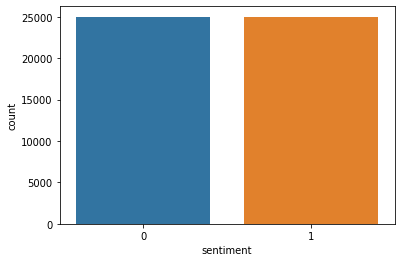

In [6]:
import seaborn as sns

sns.countplot(x="sentiment", data=mv_review)

### 5.Data Preprocessing

In [7]:
temp

'Believe it or not, this was at one time the worst movie I had ever seen. Since that time, I have seen many more movies that are worse (how is it possible??) Therefore, to be fair, I had to give this movie a 2 out of 10. But it was a tough call.'

In [8]:
TAG_re = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_re.sub('', text)

In [9]:
def preprocessing_text(text):

  sentence = remove_tags(text) # remove tag

  sentence = re.sub(r'[^a-zA-Z]\s+',' ', sentence) # remove whitespace and numbers

  sentence = re.sub(r'\s+[^a-zA-Z]\s+',' ', sentence) #single character remove

  sentence = re.sub(r'\s+',' ', sentence) #single character remove

  return sentence

In [10]:
X = []
for sent in tqdm(list(mv_review["review"])):
  X.append(preprocessing_text(sent))

In [11]:
y = mv_review["sentiment"].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [13]:
len(X_train), len(y_train)

(40000, 40000)

In [14]:
len(X_test), len(y_test)

(10000, 10000)

### 6.Embedding Layer

In [15]:
# Token the sentences into words
tokernizer = Tokenizer(num_words = 5000)
tokernizer.fit_on_texts(X_train)

In [16]:
# Transforms each text in texts to a sequence of integers.
X_train = tokernizer.texts_to_sequences(X_train)
X_test = tokernizer.texts_to_sequences(X_test)

In [17]:
vocal_length = len(tokernizer.word_index) + 1
print(vocal_length)

110316


In [18]:
max_len = 100

In [19]:
X_train = pad_sequences(X_train, padding="post", maxlen = 100)
X_test = pad_sequences(X_test, padding="post", maxlen = 100)

In [20]:
!wget https://media.githubusercontent.com/media/rohanrao619/Twitter_Sentiment_Analysis/master/glove.6B.100d.txt

--2021-05-31 12:15:42--  https://media.githubusercontent.com/media/rohanrao619/Twitter_Sentiment_Analysis/master/glove.6B.100d.txt
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘glove.6B.100d.txt’

glove.6B.100d.txt   100%[===================>] 331.04M   161MB/s    in 2.1s    

2021-05-31 12:15:58 (161 MB/s) - ‘glove.6B.100d.txt’ saved [347116733/347116733]



In [21]:
emb_dict = {}
glove_file = open("/content/glove.6B.100d.txt", encoding="utf8")

In [22]:
for line in tqdm(glove_file):
  records = line.split()
  word = records[0]
  vect_dim = np.asarray(records[1:], dtype="float32")
  emb_dict[word] = vect_dim

glove_file.close()

In [23]:
emb_matrix = np.zeros((vocal_length, 100))
for word, index in tokernizer.word_index.items():
  emb_vect = emb_dict.get(word)
  if emb_vect is not None:
    emb_matrix[index] = emb_vect

In [24]:
pd.DataFrame(emb_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000
1,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.39141,0.33440,-0.57545,0.087459,0.28787,-0.067310,0.309060,-0.263840,-0.13231,-0.207570,0.33395,-0.338480,-0.317430,-0.483360,0.146400,-0.373040,0.345770,0.052041,0.449460,-0.46971,0.02628,-0.54155,-0.155180,-0.141070,-0.039722,0.282770,0.143930,0.23464,-0.310210,0.086173,0.203970,0.52624,0.171640,-0.082378,...,-0.249780,0.92136,0.034514,0.467450,1.10790,-0.193580,-0.074575,0.233530,-0.052062,-0.220440,0.057162,-0.15806,-0.307980,-0.416250,0.37972,0.150060,-0.532120,-0.205500,-1.25260,0.071624,0.705650,0.497440,-0.42063,0.261480,-1.53800,-0.302230,-0.073438,-0.283120,0.371040,-0.25217,0.016215,-0.017099,-0.389840,0.874240,-0.725690,-0.51058,-0.52028,-0.14590,0.82780,0.270620
2,-0.071953,0.231270,0.023731,-0.506380,0.339230,0.195900,-0.32943,0.18364,-0.18057,0.289630,0.20448,-0.549600,0.273990,0.583270,0.20468,-0.492280,0.19974,-0.070237,-0.880490,0.294850,0.140710,-0.100900,0.994490,0.369730,0.445540,0.28998,-0.13760,-0.56365,-0.029365,-0.412200,-0.252690,0.631810,-0.447670,0.24363,-0.108130,0.251640,0.469670,0.37550,-0.236130,-0.141290,...,-0.223220,0.72932,-0.053211,0.435070,0.85011,-0.429350,0.926640,0.390510,1.058500,-0.245610,-0.182650,-0.53280,0.059518,-0.660190,0.18991,0.288360,-0.243400,0.527840,-0.65762,-0.140810,1.049100,0.513400,-0.23816,0.698950,-1.48130,-0.248700,-0.179360,-0.059137,-0.080560,-0.48782,0.014487,-0.625900,-0.323670,0.418620,-1.080700,0.46742,-0.49931,-0.71895,0.86894,0.195390
3,-0.270860,0.044006,-0.020260,-0.173950,0.644400,0.712130,0.35510,0.47138,-0.29637,0.544270,-0.72294,-0.004761,0.040611,0.043236,0.29729,0.107250,0.40156,-0.536620,0.033382,0.067396,0.645560,-0.085523,0.141030,0.094539,0.749470,-0.19400,-0.68739,-0.41741,-0.228070,0.120000,-0.489990,0.809450,0.045138,-0.11898,0.201610,0.392760,-0.201210,0.31354,0.753040,0.259070,...,-0.033425,0.69553,-0.644720,-0.007228,0.89575,0.200150,0.464930,0.619330,-0.106600,0.086910,-0.462300,0.18262,-0.158490,0.020791,0.19373,0.063426,-0.316730,-0.481770,-1.38480,0.136690,0.968590,0.049965,-0.27380,-0.035686,-1.05770,-0.244670,0.903660,-0.124420,0.080776,-0.83401,0.572010,0.088945,-0.425320,-0.018253,-0.079995,-0.28581,-0.01089,-0.49230,0.63687,0.236420
4,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.58826,-0.17982,-1.35810,0.425410,0.15377,0.242150,0.134740,0.411930,0.67043,-0.564180,0.42985,-0.012183,-0.116770,0.317810,0.054177,-0.054273,0.355160,-0.302410,0.314340,-0.33846,0.71715,-0.26855,-0.158370,-0.474670,0.051581,-0.332520,0.150030,-0.12990,-0.546170,-0.378430,0.642610,0.82187,-0.080006,0.078479,...,0.048850,0.78267,0.384970,0.420970,0.67882,0.103370,0.632800,-0.026595,0.586470,-0.443320,0.330570,-0.12022,-0.556450,0.073611,0.20915,0.433950,-0.012761,0.089874,-1.79910,0.084808,0.771120,0.631050,-0.90685,0.603260,-1.75150,0.185960,-0.506870,-0.702030,0.665780,-0.81304,0.187120,-0.018488,-0.267570,0.727000,-0.593630,-0.34839,-0.56094,-0.59100,1.00390,0.206640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### 7.LSTM Network

In [25]:
embedding_layer = Embedding(vocal_length, 100, weights = [emb_matrix], input_length=max_len, trainable=False)
#------------Model
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          11031600  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 11,148,977
Trainable params: 117,377
Non-trainable params: 11,031,600
_________________________________________________________________


### 8.Model Training

In [28]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
250/250 [==============================] - 9s 38ms/step - loss: 0.3807 - accuracy: 0.8281 - val_loss: 0.3745 - val_accuracy: 0.8321
Epoch 2/5
250/250 [==============================] - 8s 33ms/step - loss: 0.3566 - accuracy: 0.8410 - val_loss: 0.3581 - val_accuracy: 0.8381
Epoch 3/5
250/250 [==============================] - 8s 31ms/step - loss: 0.3399 - accuracy: 0.8506 - val_loss: 0.3478 - val_accuracy: 0.8464
Epoch 4/5
250/250 [==============================] - 8s 31ms/step - loss: 0.3237 - accuracy: 0.8584 - val_loss: 0.3500 - val_accuracy: 0.8465
Epoch 5/5
250/250 [==============================] - 8s 31ms/step - loss: 0.3095 - accuracy: 0.8664 - val_loss: 0.3321 - val_accuracy: 0.8545


### 9.Model Evaluation

In [29]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.3356 - accuracy: 0.8558


### 10.Model Analysis

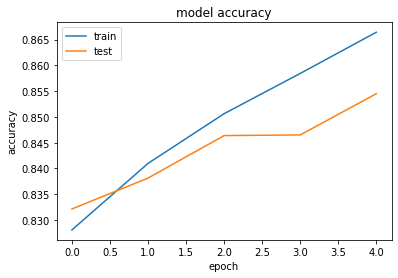

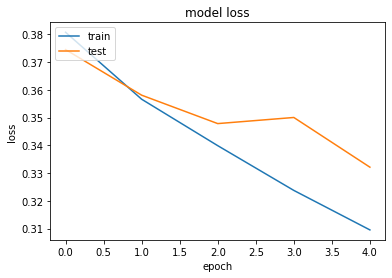

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 11.Model Prediction

In [32]:
X[20]

'Pretty bad PRC cheapie which I rarely bother to watch over again and it\'s no wonder it\'s slow and creaky and dull as a butter knife Mad doctor George Zucco is at it again turning a dimwitted farmhand in overalls (Glenn Strange into a wolf-man Unfortunately the makeup is virtually non-existent consisting only of a beard and dimestore fangs for the most part If it were not for Zucco and Strange\'s presence along with the cute Anne Nagel this would be completely unwatchable Strange who would go on to play Frankenstein\'s monster for Unuiversal in two years does a Lenny impression from "Of Mice and Men" it seems.*1/ (of Four)'

In [44]:
def Result(X):
  ex = tokernizer.texts_to_sequences(X)
  flat_list = []
  for subplit in tqdm(ex):
    for item in subplit:
      flat_list.append(item)
  ex = pad_sequences([flat_list], padding="post", maxlen=max_len)
  n2c = ["Negative","Positive"]
  result = n2c[np.argmax(model.predict(ex))]
  return result

In [49]:
Result(X[20])

'Negative'